In [23]:
import pandas as pd
import numpy as np

tests = ["mw", "ks", "es"]

data = []
for test in tests:
    with open(f"vary_test_res/test_{test}_eps.log") as f:
        lines = f.readlines()
        for line in lines:
            eps_res = [test]
            split = line.split(", ")
            for eps in split:
                if eps == "None":
                    eps_res.append(np.nan)
                else:
                    eps_res.append(float(eps))
            data.append(eps_res)

df = pd.DataFrame(data=data, columns=["test", "Q1", "Q2", "Q3", "Q4", "Q5"])
df.loc[df["test"] == "mw", "test"] = "MWU"
df.loc[df["test"] == "ks", "test"] = "KS"
df.loc[df["test"] == "es", "test"] = "ES"

df

,test,Q1,Q2,Q3,Q4,Q5
0,MWU,1.0,2.0,0.90,10.00,10.0
1,MWU,3.0,3.0,0.60,4.00,3.0
2,MWU,3.0,3.0,1.00,9.00,10.0
3,MWU,1.0,1.0,0.80,6.00,7.0
4,MWU,3.0,2.0,0.05,10.00,10.0
5,MWU,0.9,2.0,1.00,10.00,9.0
6,MWU,1.0,2.0,0.07,9.00,5.0
7,MWU,1.0,2.0,0.60,9.00,10.0
8,MWU,4.0,1.0,0.10,10.00,10.0
9,MWU,2.0,1.0,1.00,10.00,7.0


In [24]:
df = df.melt(id_vars="test", var_name="query", value_name="epsilon")
df

,test,query,epsilon
0,MWU,Q1,1.0
1,MWU,Q1,3.0
2,MWU,Q1,3.0
3,MWU,Q1,1.0
4,MWU,Q1,3.0
...,...,...,...
145,ES,Q5,6.0
146,ES,Q5,9.0
147,ES,Q5,6.0
148,ES,Q5,7.0


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 300
sns.set_theme(style="ticks", palette="colorblind", font="Times New Roman", font_scale=1.6)
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

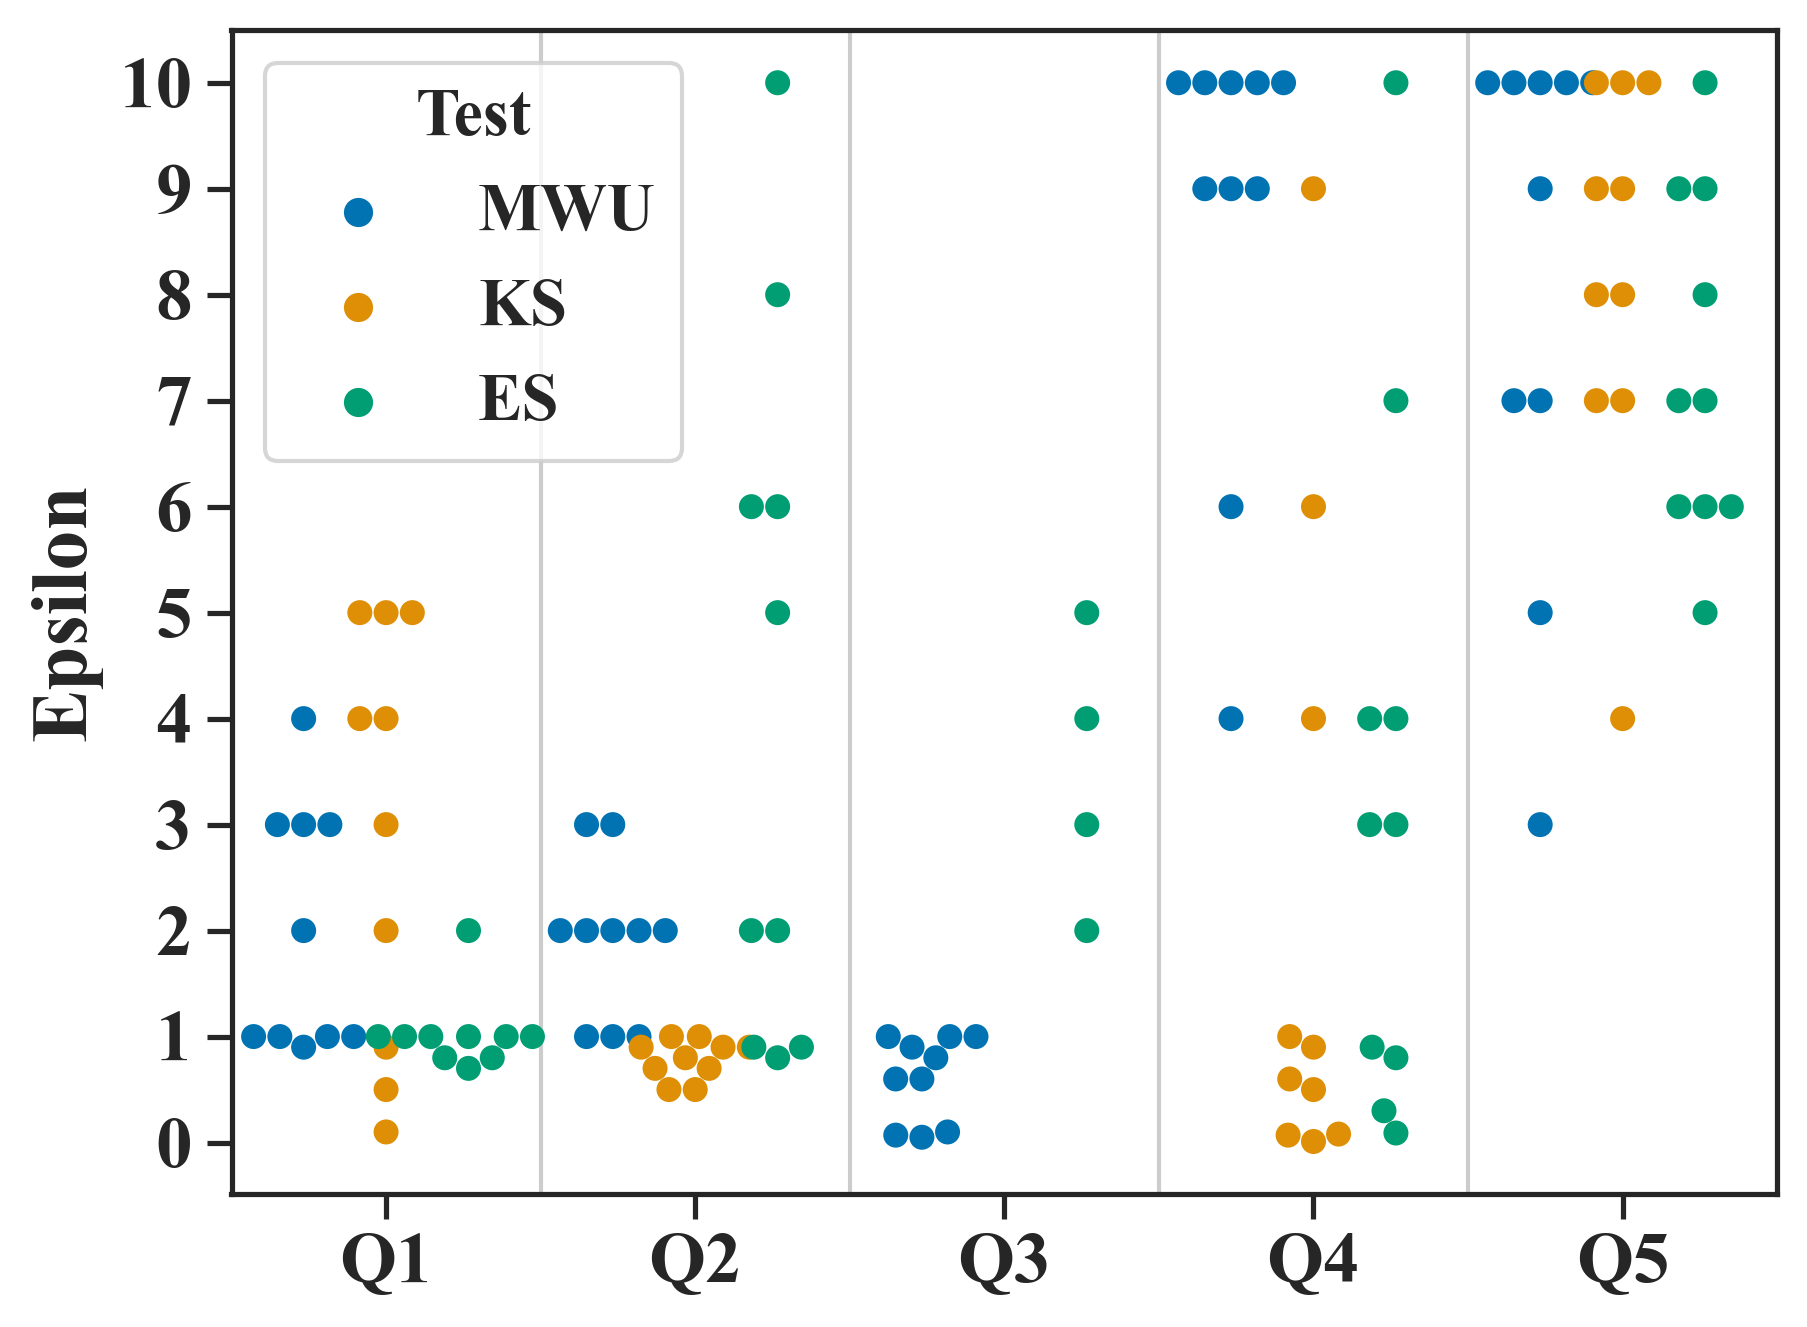

In [31]:
g = sns.swarmplot(data=df, x="query", y="epsilon", hue="test", dodge=True, size=6)
_ = g.set(xlabel=None, ylabel="Epsilon")
_ = g.set_yticks([i for i in range(0, 11)])

cords = [0.5, 1.5, 2.5, 3.5, 4.5]
for x in cords:
    plt.axvline(x=x, color="black", alpha=0.2, linewidth=1)

plt.legend(fontsize='small', title_fontsize='small')
g.legend_.set_title("Test")
plt.tight_layout()
plt.savefig("figures/vary_test.pdf")
plt.show()
plt.close()